# NBA Players - Croatia First
- The analysis was made with the aim of exploring NBA Players (1996-22) database and finding the best Croatian players in selected time period!

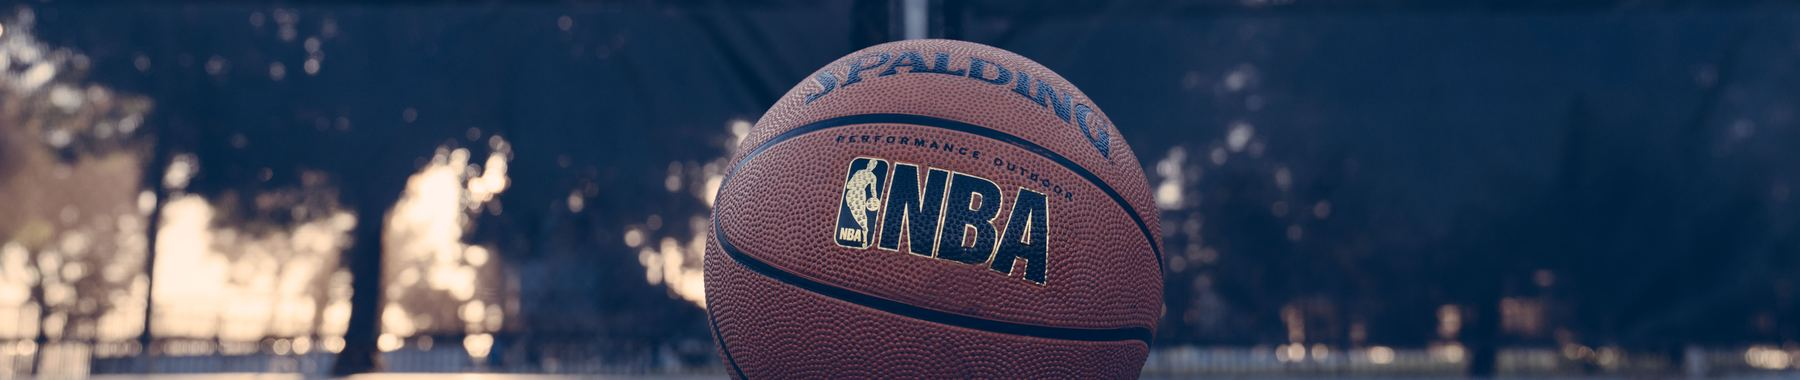

The data set contains over two decades of data on each player who has been part of an NBA teams' roster. It captures demographic variables such as age, height, weight and place of birth, biographical details like the team played for, draft year and round. In addition, it has box score statistics such as games played, average number of points, rebounds, assists, etc.

Importing the Data we got from: https://www.kaggle.com/datasets/justinas/nba-players-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns
import os
import gc

In [2]:
df = pd.read_csv("all_seasons.csv")

## Let's start by getting to know the data 

In [3]:
df[(df["season"] == "2021-22") & (df["country"] == "Croatia")]

Unnamed: 0       player_name team_abbreviation   age  player_height  \
11818       11818       Ivica Zubac               LAC  25.0         213.36   
11861       11861  Bojan Bogdanovic               UTA  33.0         200.66   

       player_weight college  country draft_year draft_round  ...   pts  reb  \
11818     108.862080    None  Croatia       2016           2  ...  10.3  8.5   
11861     102.511792    None  Croatia       2011           2  ...  18.1  4.3   

       ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct   season  
11818  1.6        -3.5     0.115     0.223    0.168   0.660    0.097  2021-22  
11861  1.7         4.8     0.027     0.106    0.232   0.599    0.086  2021-22  

[2 rows x 22 columns]

In [4]:
df

Unnamed: 0        player_name team_abbreviation   age  player_height  \
0               0      Dennis Rodman               CHI  36.0         198.12   
1               1  Dwayne Schintzius               LAC  28.0         215.90   
2               2       Earl Cureton               TOR  39.0         205.74   
3               3        Ed O'Bannon               DAL  24.0         203.20   
4               4        Ed Pinckney               MIA  34.0         205.74   
...           ...                ...               ...   ...            ...   
12300       12300    Markieff Morris               MIA  32.0         205.74   
12301       12301     Markelle Fultz               ORL  24.0         193.04   
12302       12302       Marcus Smart               BOS  28.0         193.04   
12303       12303     Marcus Garrett               MIA  23.0         195.58   
12304       12304       Micah Potter               DET  24.0         208.28   

       player_weight                      college country draft_year  \
0          99.790240  Southeastern Oklahoma State     USA       1986   
1         117.933920                      Florida     USA       1990   
2          95.254320                Detroit Mercy     USA       1979   
3         100.697424                         UCLA     USA       1995   
4         108.862080                    Villanova     USA       1985   
...              ...                          ...     ...        ...   
12300     111.130040                       Kansas     USA       2011   
12301      94.800728                   Washington     USA       2017   
12302      99.790240               Oklahoma State     USA       2014   
12303      92.986360                       Kansas     USA  Undrafted   
12304     112.490816                    Wisconsin     USA  Undrafted   

      draft_round  ...   pts   reb  ast  net_rating  oreb_pct  dreb_pct  \
0               2  ...   5.7  16.1  3.1        16.1     0.186     0.323   
1               1  ...   2.3   1.5  0.3        12.3     0.078     0.151   
2               3  ...   0.8   1.0  0.4        -2.1     0.105     0.102   
3               1  ...   3.7   2.3  0.6        -8.7     0.060     0.149   
4               1  ...   2.4   2.4  0.2       -11.2     0.109     0.179   
...           ...  ...   ...   ...  ...         ...       ...       ...   
12300           1  ...   7.6   2.6  1.4         4.5     0.059     0.089   
12301           1  ...  10.8   2.7  5.5        -5.3     0.010     0.116   
12302           1  ...  12.1   3.8  5.9         9.3     0.018     0.093   
12303   Undrafted  ...   1.1   1.9  0.6         5.8     0.072     0.108   
12304   Undrafted  ...   4.0   3.0  0.0       -56.4     0.095     0.125   

       usg_pct  ts_pct  ast_pct   season  
0        0.100   0.479    0.113  1996-97  
1        0.175   0.430    0.048  1996-97  
2        0.103   0.376    0.148  1996-97  
3        0.167   0.399    0.077  1996-97  
4        0.127   0.611    0.040  1996-97  
...        ...     ...      ...      ...  
12300    0.197   0.547    0.116  2021-22  
12301    0.265   0.517    0.448  2021-22  
12302    0.179   0.540    0.245  2021-22  
12303    0.086   0.280    0.069  2021-22  
12304    0.148   0.505    0.000  2021-22  

[12305 rows x 22 columns]

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  int64  
 1   player_name        12305 non-null  object 
 2   team_abbreviation  12305 non-null  object 
 3   age                12305 non-null  float64
 4   player_height      12305 non-null  float64
 5   player_weight      12305 non-null  float64
 6   college            12305 non-null  object 
 7   country            12305 non-null  object 
 8   draft_year         12305 non-null  object 
 9   draft_round        12305 non-null  object 
 10  draft_number       12305 non-null  object 
 11  gp                 12305 non-null  int64  
 12  pts                12305 non-null  float64
 13  reb                12305 non-null  float64
 14  ast                12305 non-null  float64
 15  net_rating         12305 non-null  float64
 16  oreb_pct           123

In [6]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [7]:
df.describe(include="O") 

player_name team_abbreviation college country draft_year draft_round  \
count          12305             12305   12305   12305      12305       12305   
unique          2463                36     347      82         47           9   
top     Vince Carter               CLE    None     USA  Undrafted           1   
freq              22               433    1789   10308       2224        7071   

       draft_number   season  
count         12305    12305  
unique           76       26  
top       Undrafted  2021-22  
freq           2277      605

To make easier for readers of this analysis to understand the data, here are the descriptions of some column names in the df:
- pts : Average number of points scored (points_avg)
- reb : Average number of rebounds grabbed (rebounds_avg)
- ast : Average number of assists distributed (assists_avg)
- ts_pct : Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (shooting_eff_pct)
- ast_pct : Percentage of teammate field goals the player assisted while he was on the floor (assisted_goals_pct)

##  Data Cleaning

In [8]:
# since we do not need these columns for out analysis
df.drop(['Unnamed: 0',
         'draft_year', 
         'draft_round', 
         'draft_number', 
         'college','oreb_pct', 
         'dreb_pct', 
         'usg_pct','net_rating'], axis=1, inplace=True)

In [9]:
df.head(3) 

player_name team_abbreviation   age  player_height  player_weight  \
0      Dennis Rodman               CHI  36.0         198.12       99.79024   
1  Dwayne Schintzius               LAC  28.0         215.90      117.93392   
2       Earl Cureton               TOR  39.0         205.74       95.25432   

  country  gp  pts   reb  ast  ts_pct  ast_pct   season  
0     USA  55  5.7  16.1  3.1   0.479    0.113  1996-97  
1     USA  15  2.3   1.5  0.3   0.430    0.048  1996-97  
2     USA   9  0.8   1.0  0.4   0.376    0.148  1996-97

In [10]:
df.team_abbreviation.unique() 
# Seems like there are to many clubs -> there should be 30 

array(['CHI', 'LAC', 'TOR', 'DAL', 'MIA', 'HOU', 'LAL', 'ATL', 'MIL',
       'DEN', 'SEA', 'POR', 'VAN', 'NJN', 'BOS', 'IND', 'SAC', 'MIN',
       'PHI', 'ORL', 'SAS', 'PHX', 'DET', 'CHH', 'CLE', 'GSW', 'UTA',
       'WAS', 'NYK', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP'],
      dtype=object)

In [11]:
df.team_abbreviation.replace([ 'NOK' , 'CHH' , 'NJN' , 'NOH' , 'SEA' , 'VAN'], 
                             value=["NOP", "CHA", "BKN", "NOP", "OKC", "UTA"], inplace=True)

In [12]:
len(df.team_abbreviation.unique() )


30

In [13]:
len(df.player_name.unique())

2463

In [14]:
# renaming the columns for clearer understanding
df.rename(columns= {"gp":"games_season", 
                    "pts":"points_avg",
                    "reb":"rebounds_avg",
                    "ast":"assists_avg",
                    "ts_pct":"shooting_eff_pct",
                    "ast_pct":"assisted_goals_pct"}, inplace=True)

In [15]:
# check out the new columns
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'country', 'games_season', 'points_avg',
       'rebounds_avg', 'assists_avg', 'shooting_eff_pct', 'assisted_goals_pct',
       'season'],
      dtype='object')

In [16]:
df.duplicated(keep="first").sum() 
# nice!

0

## Normal Distribution of ratings in df

<AxesSubplot:xlabel='points_avg', ylabel='Count'>

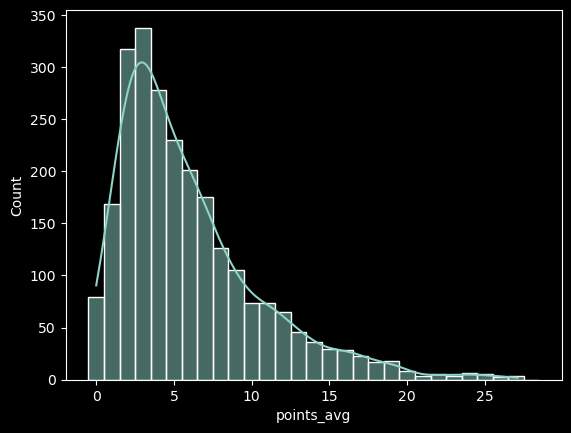

In [33]:
# for all the players in our df 
sns.histplot(df.groupby('player_name').mean()["points_avg"], discrete=True, kde=True) 

<AxesSubplot:xlabel='shooting_eff_pct', ylabel='Count'>

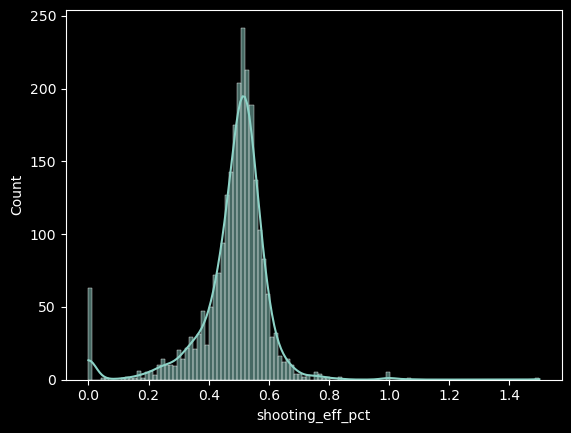

In [34]:
# for all the players in our df 
sns.histplot(df.groupby('player_name').mean()["shooting_eff_pct"], discrete=False, kde=True) 

In [19]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'country', 'games_season', 'points_avg',
       'rebounds_avg', 'assists_avg', 'shooting_eff_pct', 'assisted_goals_pct',
       'season'],
      dtype='object')

## Correlation 

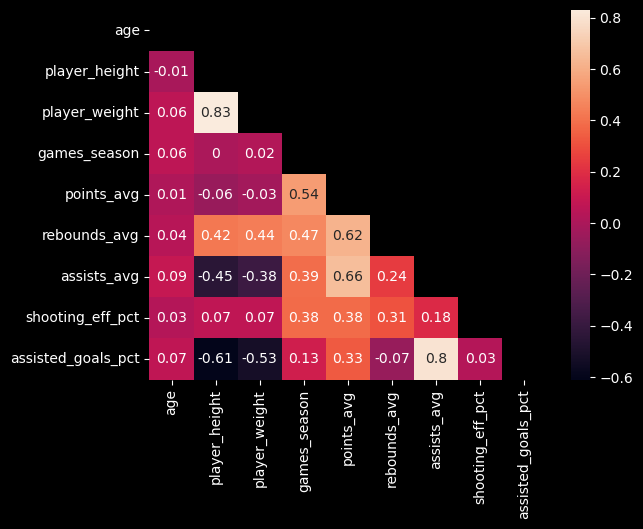

In [35]:
corr = df.corr()
matrix = np.triu(corr) 

plt.figure() 
sns.heatmap(round(corr,2), mask=matrix, annot=True) 
plt.show() 
# now when we see that the correlation between player_height and points_avg is close to zero 

In [21]:
df.sort_values(by="season")

player_name team_abbreviation   age  player_height  player_weight  \
0         Dennis Rodman               CHI  36.0         198.12      99.790240   
300          Yinka Dare               BKN  24.0         213.36     120.201880   
299     Xavier McDaniel               BKN  34.0         200.66      98.883056   
298       Willie Burton               ATL  29.0         203.20      95.254320   
297     Willie Anderson               MIA  30.0         203.20      90.718400   
...                 ...               ...   ...            ...            ...   
11902      Aaron Gordon               DEN  26.0         203.20     106.594120   
11903  Alfonzo McKinnie               CHI  29.0         200.66      97.522280   
11904      Ben McLemore               POR  29.0         190.50      88.450440   
11906       Amir Coffey               LAC  25.0         200.66      95.254320   
12304      Micah Potter               DET  24.0         208.28     112.490816   

      country  games_season  points_avg  rebounds_avg  assists_avg  \
0         USA            55         5.7          16.1          3.1   
300       USA            41         1.4           2.0          0.1   
299       USA            62         5.6           5.1          1.0   
298       USA            24         6.2           1.7          0.5   
297       USA            28         3.0           1.5          1.2   
...       ...           ...         ...           ...          ...   
11902     USA            75        15.0           5.9          2.5   
11903     USA            17         3.5           1.9          0.3   
11904     USA            64        10.2           1.6          0.9   
11906     USA            69         9.0           2.9          1.8   
12304     USA             3         4.0           3.0          0.0   

       shooting_eff_pct  assisted_goals_pct   season  
0                 0.479               0.113  1996-97  
300               0.406               0.013  1996-97  
299               0.439               0.085  1996-97  
298               0.507               0.056  1996-97  
297               0.570               0.191  1996-97  
...                 ...                 ...      ...  
11902             0.602               0.109  2021-22  
11903             0.457               0.034  2021-22  
11904             0.567               0.077  2021-22  
11906             0.598               0.112  2021-22  
12304             0.505               0.000  2021-22  

[12305 rows x 13 columns]

## Regplot 

In [37]:
season_96_97 = df.loc[(df['season'] == '1996-97')]
season_21_22 = df.loc[(df['season'] == '2021-22')]
df_grouped = df.groupby('player_name').mean()
# with this data we are gonna visualize how this correlation looks 
# like on the example of assisted_goals_pct and player_height

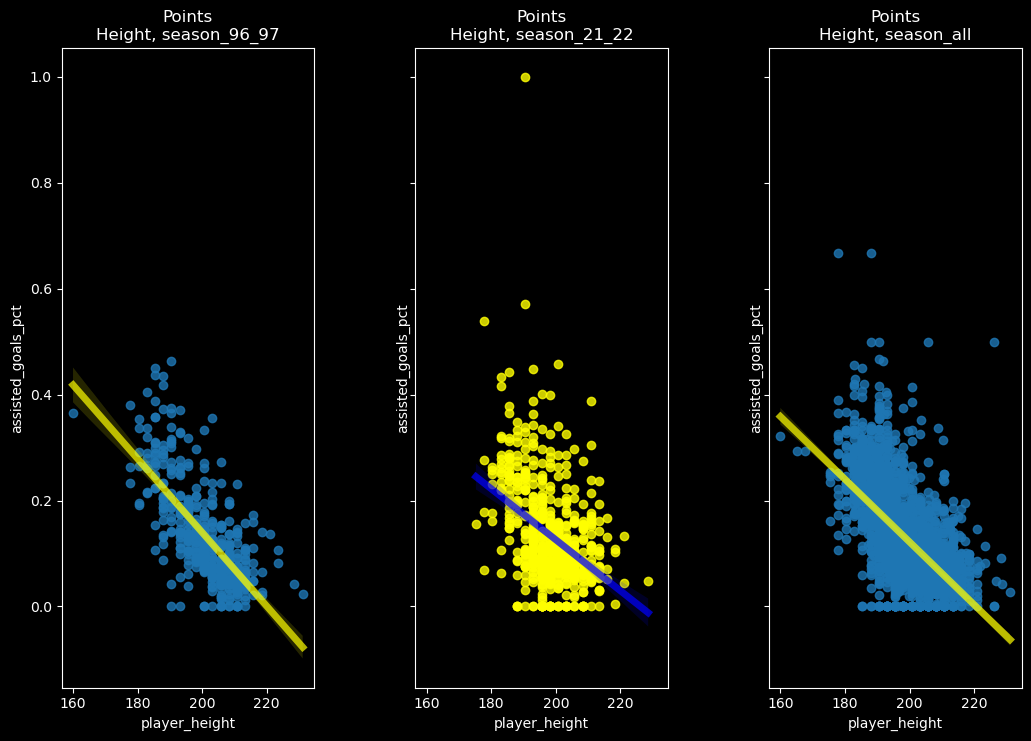

In [36]:
# for these plots, we will use variables with high negative correlation!
fig1, axs1 = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(12,8))
sns.regplot(x='player_height', y='assisted_goals_pct', 
            fit_reg=True, color='tab:blue', 
            data=season_96_97, line_kws={"color":"yellow","alpha":0.7,"lw":5}, 
            ax=axs1[0]).set_title('Points\nHeight, season_96_97')
            
sns.regplot(x='player_height', y='assisted_goals_pct', 
            fit_reg=True, color='yellow', 
            data=season_21_22, 
            line_kws={"color":"b","alpha":0.7,"lw":5}, 
            ax=axs1[1]).set_title('Points\nHeight, season_21_22')

sns.regplot(x='player_height', y='assisted_goals_pct', 
            fit_reg=True, color='tab:blue', 
            data=df_grouped, 
            line_kws={"color":"yellow","alpha":0.7,"lw":5}, 
            ax=axs1[2]).set_title('Points\nHeight, season_all')
 
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()
# Interesting! Seems like the height here is a bit more significant factor, but still a very low one

## Lets check all the Croatian players by some metrics to find the best ones!

In [24]:
# all Croatian players 
df[(df["country"] == "Croatia")].groupby("player_name").mean()

age  player_height  player_weight  games_season  \
player_name                                                          
Ante Zizic        22.0     209.973333     116.421947     37.666667   
Bojan Bogdanovic  29.5     202.565000     100.980919     75.375000   
Bruno Sundov      22.0     218.440000     108.667683     14.571429   
Dalibor Bagaric   21.0     215.900000     126.552168     31.666667   
Damjan Rudez      30.0     207.433333      99.487845     48.666667   
Dario Saric       25.0     208.280000     101.513890     71.200000   
Dragan Bender     20.5     215.265000     104.779752     46.750000   
Duje Dukan        24.0     205.740000      99.790240      1.000000   
Gordan Giricek    28.5     196.850000      97.371083     64.000000   
Ivica Zubac       22.5     214.630000     108.862080     60.000000   
Luka Samanic      20.5     208.280000     102.965384     18.000000   
Mario Hezonja     23.0     203.200000      99.699522     66.000000   
Mario Kasun       25.5     214.630000     117.933920     36.000000   
Toni Kukoc        32.5     210.820000     106.185887     60.900000   
Zoran Planinic    22.0     200.660000      89.962413     49.333333   

                  points_avg  rebounds_avg  assists_avg  shooting_eff_pct  \
player_name                                                                 
Ante Zizic          5.300000      3.433333     0.466667          0.644333   
Bojan Bogdanovic   15.187500      3.637500     1.600000          0.588125   
Bruno Sundov        1.885714      1.100000     0.185714          0.375571   
Dalibor Bagaric     2.300000      2.266667     0.400000          0.363000   
Damjan Rudez        2.966667      0.633333     0.500000          0.543000   
Dario Saric        11.480000      5.720000     1.920000          0.562400   
Dragan Bender       5.400000      3.850000     1.275000          0.507500   
Duje Dukan          6.000000      4.000000     1.000000          0.300000   
Gordan Giricek      9.433333      2.350000     1.500000          0.522000   
Ivica Zubac         7.950000      6.066667     1.083333          0.618667   
Luka Samanic        4.500000      2.700000     1.250000          0.484000   
Mario Hezonja       6.840000      3.140000     1.240000          0.511400   
Mario Kasun         2.800000      2.500000     0.150000          0.505500   
Toni Kukoc         11.160000      4.180000     3.680000          0.520700   
Zoran Planinic      3.833333      1.333333     1.100000          0.492000   

                  assisted_goals_pct  
player_name                           
Ante Zizic                  0.050667  
Bojan Bogdanovic            0.082250  
Bruno Sundov                0.076143  
Dalibor Bagaric             0.075667  
Damjan Rudez                0.079333  
Dario Saric                 0.114400  
Dragan Bender               0.095500  
Duje Dukan                  0.067000  
Gordan Giricek              0.115833  
Ivica Zubac                 0.088833  
Luka Samanic                0.127500  
Mario Hezonja               0.104000  
Mario Kasun                 0.029500  
Toni Kukoc                  0.236900  
Zoran Planinic              0.212667

In [25]:
df[(df["country"] == "Croatia")]["player_name"].unique()

array(['Toni Kukoc', 'Bruno Sundov', 'Dalibor Bagaric', 'Gordan Giricek',
       'Zoran Planinic', 'Mario Kasun', 'Bojan Bogdanovic',
       'Damjan Rudez', 'Mario Hezonja', 'Duje Dukan', 'Dario Saric',
       'Dragan Bender', 'Ivica Zubac', 'Ante Zizic', 'Luka Samanic'],
      dtype=object)

In [26]:
import plotly.graph_objects as go

# setting the data for y 
ton = df[(df["country"] == "Croatia") & (df["player_name"] == "Toni Kukoc")]['points_avg']
bru = df[(df["country"] == "Croatia") & (df["player_name"] == "Bruno Sundov")]['points_avg']
dal = df[(df["country"] == "Croatia") & (df["player_name"] == "Dalibor Bagaric")]['points_avg']
gor = df[(df["country"] == "Croatia") & (df["player_name"] == "Gordan Giricek")]['points_avg']
zor = df[(df["country"] == "Croatia") & (df["player_name"] == "Zoran Planinic")]['points_avg']
kas = df[(df["country"] == "Croatia") & (df["player_name"] == "Mario Kasun")]['points_avg']
boj = df[(df["country"] == "Croatia") & (df["player_name"] == "Bojan Bogdanovic")]['points_avg']
dam = df[(df["country"] == "Croatia") & (df["player_name"] == "Damjan Rudez")]['points_avg']
hez = df[(df["country"] == "Croatia") & (df["player_name"] == "Mario Hezonja")]['points_avg']
duj = df[(df["country"] == "Croatia") & (df["player_name"] == "Duje Dukan")]['points_avg']
dar = df[(df["country"] == "Croatia") & (df["player_name"] == "Dario Saric")]['points_avg']
dra = df[(df["country"] == "Croatia") & (df["player_name"] == "Dragan Bender")]['points_avg']
ivi = df[(df["country"] == "Croatia") & (df["player_name"] == "Ivica Zubac")]['points_avg']
ant = df[(df["country"] == "Croatia") & (df["player_name"] == "Ante Zizic")]['points_avg']
luk = df[(df["country"] == "Croatia") & (df["player_name"] == "Luka Samanic")]['points_avg']

# names of all the Croatian players
x_data = ['Toni Kukoc', 'Bruno Sundov', 'Dalibor Bagaric', 'Gordan Giricek',
       'Zoran Planinic', 'Mario Kasun', 'Bojan Bogdanovic',
       'Damjan Rudez', 'Mario Hezonja', 'Duje Dukan', 'Dario Saric',
       'Dragan Bender', 'Ivica Zubac', 'Ante Zizic', 'Luka Samanic']

# list for looping
y_data = [ton, bru, dal, gor, zor, kas, boj, 
        dam, hez, duj, dar, dra, ivi, ant, luk]

# selecting the color palettes for our boxplots 
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)', 
         'rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)']

fig = go.Figure()

# zipping the lists and looping! 
for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            name=xd,
            y=yd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )

fig.update_layout(
        title='Average Points Scored by Croatian NBA Players',
        yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()


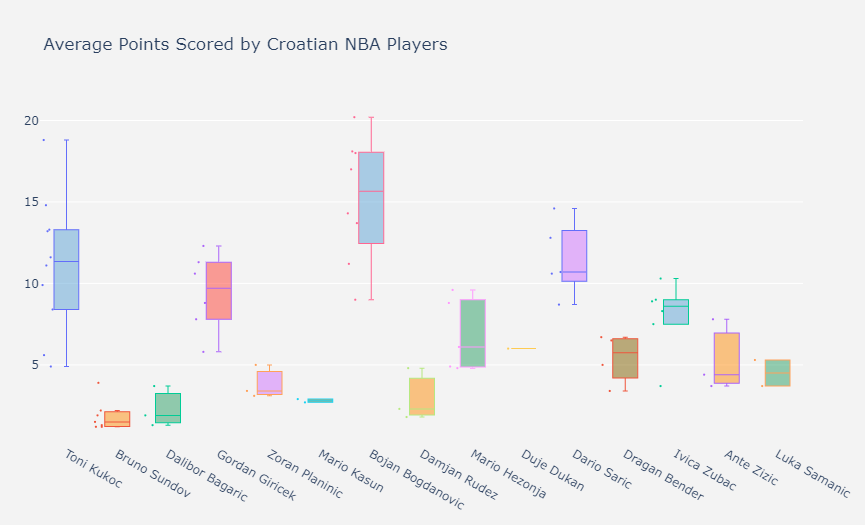

In [27]:
# Let's take top 4 by median and make a  -> Toni, Bojan, Gordan & Dario
# we are going to use the following columns: 
# 'points_avg', 'rebounds_avg', 'assists_avg', 'shooting_eff_pct', 'assisted_goals_pct'

In [28]:
df.columns 

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'country', 'games_season', 'points_avg',
       'rebounds_avg', 'assists_avg', 'shooting_eff_pct', 'assisted_goals_pct',
       'season'],
      dtype='object')

In [29]:
from math import pi

# now we need to create a list of lists, containg the key metrics for the best Croatian players (96-22)
points_lst = list(df[(df["country"] == "Croatia") & df["player_name"].isin(["Toni Kukoc", "Bojan Bogdanovic", 
 "Gordan Giricek", "Dario Saric"])].groupby("player_name").mean()["points_avg"])
#print(points_lst)

reb_lst = list(df[(df["country"] == "Croatia") & df["player_name"].isin(["Toni Kukoc", "Bojan Bogdanovic", 
 "Gordan Giricek", "Dario Saric"])].groupby("player_name").mean()["rebounds_avg"])
#print(reb_lst)

assist_avg_lst = list(df[(df["country"] == "Croatia") & df["player_name"].isin(["Toni Kukoc", "Bojan Bogdanovic", 
 "Gordan Giricek", "Dario Saric"])].groupby("player_name").mean()["assists_avg"])
#print(assist_avg_lst)

shoot_lst = list(df[(df["country"] == "Croatia") & df["player_name"].isin(["Toni Kukoc", "Bojan Bogdanovic", 
 "Gordan Giricek", "Dario Saric"])].groupby("player_name").mean()["shooting_eff_pct"])
#print(shoot_lst)

assist_goal_lst = list(df[(df["country"] == "Croatia") & df["player_name"].isin(["Toni Kukoc", "Bojan Bogdanovic", 
 "Gordan Giricek", "Dario Saric"])].groupby("player_name").mean()["assisted_goals_pct"])
#print(assist_goal_lst)

list_players_data = [points_lst, reb_lst, assist_avg_lst, shoot_lst, assist_goal_lst]
list_players_data 

[[15.1875, 11.48, 9.433333333333334, 11.16],
 [3.6375, 5.720000000000001, 2.35, 4.18],
 [1.5999999999999999, 1.92, 1.5, 3.6799999999999997],
 [0.588125, 0.5624, 0.522, 0.5206999999999999],
 [0.08224999999999999,
  0.11439999999999999,
  0.11583333333333333,
  0.23689999999999997]]

## Some of Best Croatian NBA players in Spider charts!

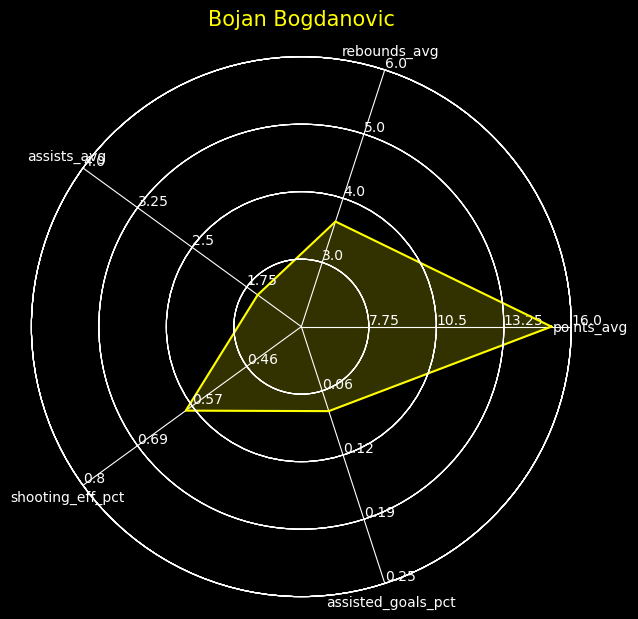

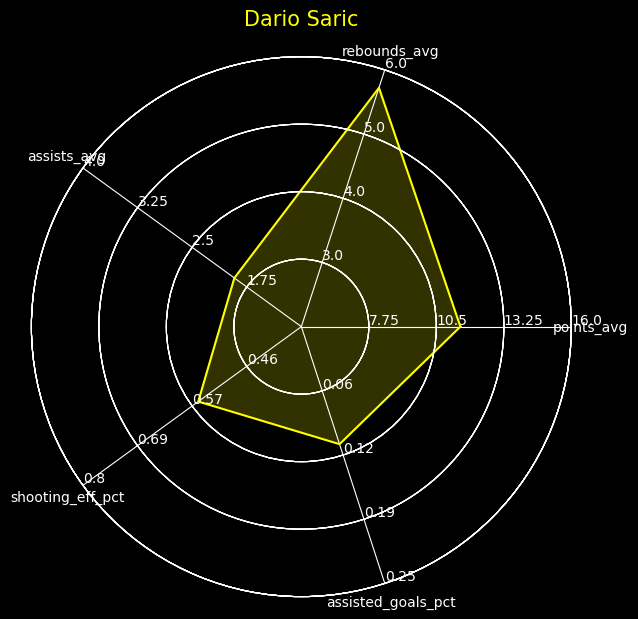

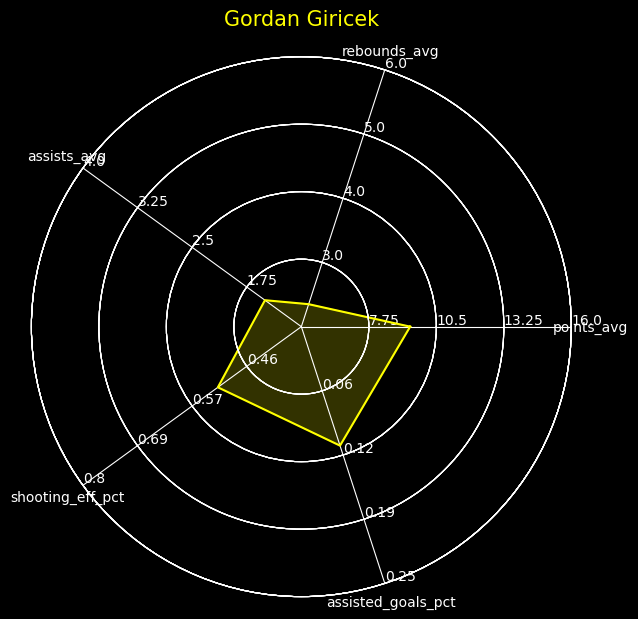

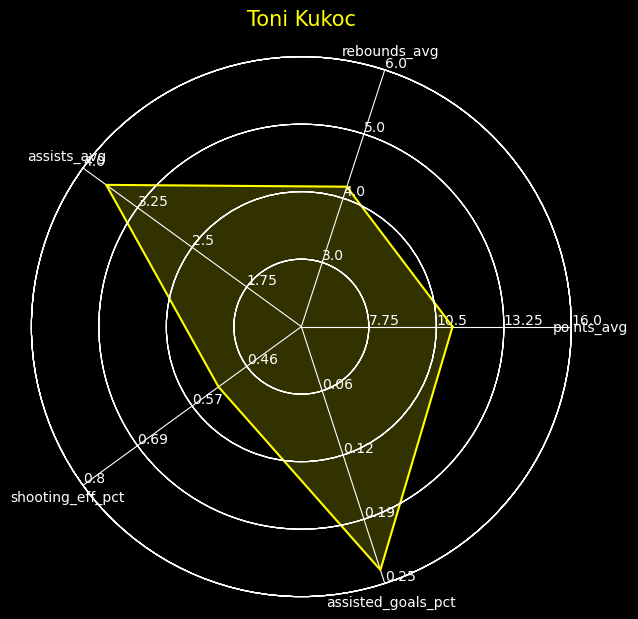

In [30]:
# Selectd ones are the ones with the highest median of points_avg
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=5):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

# setting the range
ranges = [(5, 16), (2, 6), (1, 4),
         (0.35, 0.8), (0, 0.25)]   

# selecting the variables 
variables = ("points_avg", "rebounds_avg", "assists_avg", 
            "shooting_eff_pct", "assisted_goals_pct") 
players = ['Bojan Bogdanovic\n','Dario Saric\n','Gordan Giricek\n','Toni Kukoc\n']

# creating n (in this case 4) radar charts with data from above
for j in range(len(list_players_data[0])):
    plt.style.use("dark_background")
    data = [i[j] for i in list_players_data]
    fig1 = plt.figure(figsize=(6, 6))
    radar = ComplexRadar(fig1, variables, ranges)
    radar.plot(data, color="yellow")
    radar.fill(data, alpha=0.2,color="yellow")
    plt.title(players[j], fontsize = 15, color="yellow")   
    plt.show()     
 

## Visualization of individual performances through out a career in the NBA

In [31]:
# data for the creation of lineplots
p1 = pd.DataFrame(df[(df["country"] == "Croatia") & 
   df["player_name"].isin(["Toni Kukoc", "Bojan Bogdanovic", 
 "Gordan Giricek", "Dario Saric"])])[["player_name","season","points_avg"]]

p2 = pd.DataFrame(df[(df["country"] == "Croatia") & 
   df["player_name"].isin(["Toni Kukoc", "Bojan Bogdanovic", 
 "Gordan Giricek", "Dario Saric"])])[["player_name","season","rebounds_avg"]]

p3 = pd.DataFrame(df[(df["country"] == "Croatia") & 
   df["player_name"].isin(["Toni Kukoc", "Bojan Bogdanovic", 
 "Gordan Giricek", "Dario Saric"])])[["player_name","season","assists_avg"]]

p4 = pd.DataFrame(df[(df["country"] == "Croatia") & 
   df["player_name"].isin(["Toni Kukoc", "Bojan Bogdanovic", 
 "Gordan Giricek", "Dario Saric"])])[["player_name","season","shooting_eff_pct"]]

p5 = pd.DataFrame(df[(df["country"] == "Croatia") & 
   df["player_name"].isin(["Toni Kukoc", "Bojan Bogdanovic", 
 "Gordan Giricek", "Dario Saric"])])[["player_name","season","assisted_goals_pct"]]

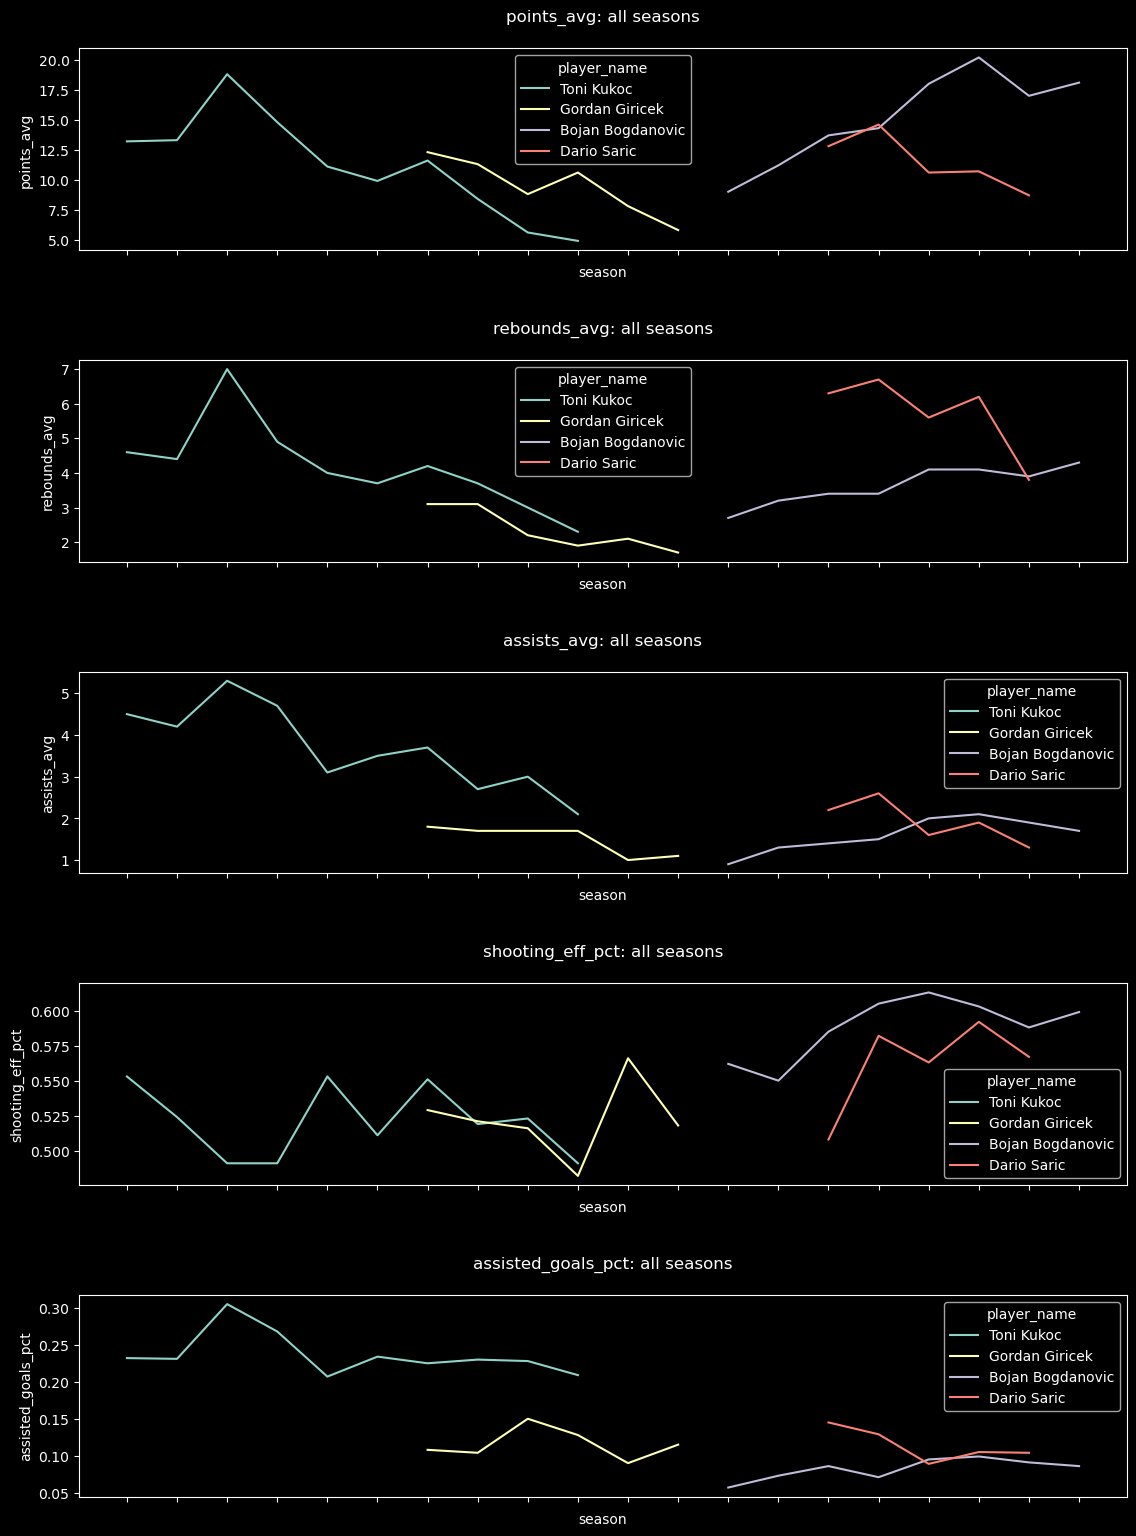

In [32]:
fig, ax = plt.subplots(5, 1, figsize=(12,16))

# points_avg
ax1 = sns.lineplot(x="season", y="points_avg",
             hue="player_name", data=p1, ax = ax[0])
ax1.set(xticklabels=[])  
ax1.set(title='points_avg: all seasons\n')  # add a title
ax1.set_xlabel='season'

# rebounds_avg
ax2 = sns.lineplot(x="season", y="rebounds_avg",
             hue="player_name", data=p2, ax = ax[1])
ax2.set(xticklabels=[])  
ax2.set(title='rebounds_avg: all seasons\n')  # add a title
ax2.set_xlabel='season'

# assists_avg
ax3 = sns.lineplot(x="season", y="assists_avg",
             hue="player_name", data=p3, ax = ax[2])
ax3.set(xticklabels=[])  
ax3.set(title='assists_avg: all seasons\n')  # add a title
ax3.set_xlabel='season'

# shooting_eff_pct
ax4 = sns.lineplot(x="season", y="shooting_eff_pct",
             hue="player_name", data=p4, ax = ax[3])
ax4.set(xticklabels=[]) 
ax4.set(title='shooting_eff_pct: all seasons\n')  # add a title
ax4.set_xlabel='season'

# assisted_goals_pct
ax5 = sns.lineplot(x="season", y="assisted_goals_pct",
             hue="player_name", data=p5, ax = ax[4])
ax5.set(xticklabels=[])  
ax5.set(title='assisted_goals_pct: all seasons\n')  # add a title
ax5.set_xlabel='season'

plt.tight_layout(pad = 3)
plt.show()

 I hope you enjoyed it, feel free to leave feedback if you want!

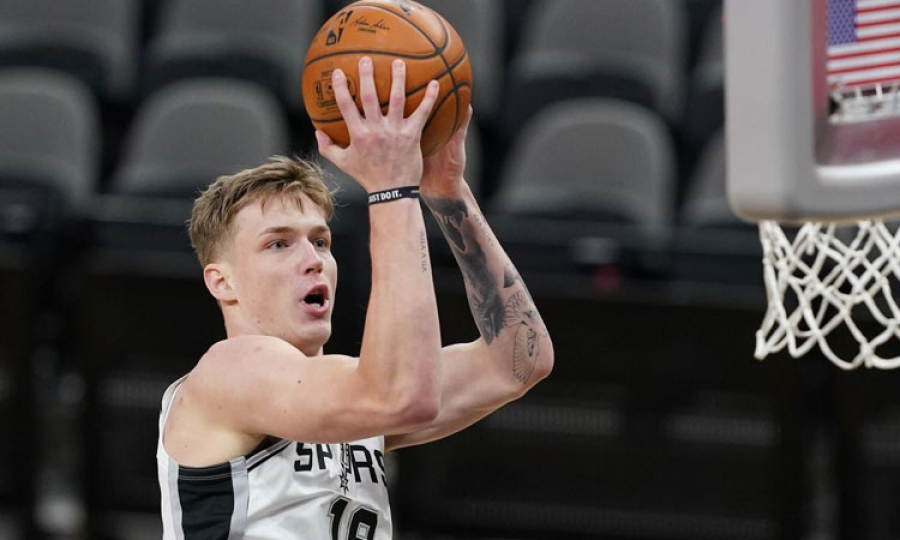